<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Roman Volykhin (@GerrBert). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose

# <center> Fall 2019. Quiz 1. Decision trees and Random Forests. Solution </center>

Prior to working on the assignment, you'd better check out the corresponding course material:

 1. [Classification, Decision Trees and k Nearest Neighbors](https://mlcourse.ai/articles/topic3-dt-knn/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 1. Ensembles:
  - [Bagging](https://mlcourse.ai/articles/topic5-part1-bagging/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://mlcourse.ai/articles/topic5-part2-rf/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://mlcourse.ai/articles/topic5-part3-feature-importance/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 1. There are 5 video lectures on trees, forests and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 
  
We suggest that you first read the articles (quiz questions are based on them), if something is not clear - watch thr corresponding lecture. 
 
### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/1eT1niiuyFvmpYjL5rY6wRplocoqUHdeCTd6jAa_vsrk). 

 
### <center> Deadline for Quiz: 2019 September 27, 20:59 CET (London time)
    
Solutions are discussed during a [live YouTube session](https://www.youtube.com/watch?v=EEjjENNH3J0) on September 28. You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 

## Part 1. Decision trees

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz1\_q1-5__*

**Question 1**. Which of these problems does not fall into 3 main types of ML tasks: classification, regression, and clustering?
 - Identifying a topic of a live-chat with a customer
 - Grouping news into topics
 - Predicting LTV (Life-Time Value) - the amount of money spent by a customer in a certain large period of time
 - Listing top products that a user is prone to buy (based on his/her click history) **[+]**

 **Comment:** 1 - classification, 2 - clustering, 3 - regression, 4 - ranking
 
**<font color='red'>Grading-wise:</font> Option 1 will also be treated as a correct answer, see [Live Session 1](https://www.youtube.com/watch?v=EEjjENNH3J0). So correct choices are 1 or 4 or both 1 and 4.**

**Question 2**. Maximal possible entropy is achieved when all states are equally probable (prove it yourself for a system with 2 states with probabilities $p$ and $1-p$). What's the maximal possible entropy of a system with N states? (here all logs are with base 2)
 - $N \log N$
 - $-\log N$
 - $\log N$ **[+]**
 - $-N \log N$

 **Solution:** 

For a system with 2 possible states, let's denote $p$ being the probability of finding the system in the first state. Then $1-p$ will be the probability of finding the system in the 2nd state. Then, entropy: $$S = - \sum_{i=1}^N p_i \log p_i = -p \log p - (1-p) \log (1-p).$$

To maximize this expression, first, we need to find its derivative w.r.t. to $p$ and to set it to 0:

$$\frac{dS}{dp} = - \log p - p\frac{1}{p\ln 2} - (-1) \log{(1-p)} - (1-p)\frac{1}{(1-p)\ln 2} (-1) = \log{(1-p)} - \log p.$$

$$\frac{dS}{dp} = 0 \Rightarrow \log{(1-p)} - \log p \Rightarrow 1-p = p = \frac{1}{2}.$$

A zero derivative is only a necessary condition for an extremum to be a maximum point. By analyzing second derivative w.r.t. to $p$ you can prove that $\frac{1}{2}$ is indeed a maximum point for $S$ (it's straightforward but skipped here). 

So entropy of a system with 2 possible states is maximized when these states are equally probable.

**Let's prove** that maximal possible entropy of a system with $N$ states is achieved when all states are equally probable (all $p_i = \frac{1}{N}$).

(**Disclaimer:** *It's not a math class, and the proof is not 100% mathematically strict, we skip some formal justifications*).

$\renewcommand{\qedsymbol}{\rule{0.7em}{0.7em}}$

We've got a constrained optimization problem:

$$\large \begin{cases} S = - \sum_{i=1}^N p_i \log p_i \rightarrow \max \\ \sum_{i=1}^N p_i = 1\end{cases}$$

To solve this, we need to resort to [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier).

$$\large \mathcal{L} = - \sum_{i=1}^N p_i \log p_i - \lambda (\sum_{i=1}^N p_i - 1) $$

To find extrema, we need to solve the following system of equations:

$$\large \begin{cases} \frac{\partial \mathcal{L}}{\partial \lambda} = 0 \\ \frac{\partial \mathcal{L}}{\partial p_j} = 0, j = 1 \ldots N  \end{cases}$$

This yields

$$\large \begin{cases} \sum_{i=1}^N p_i = 1 \\ - \log p_j - \frac{1}{\ln2} - \lambda = 0, j = 1 \ldots N  \end{cases}$$


And, finally, $$p_1 = \ldots = p_N = \frac{1}{N}.$$

*(We can find $\lambda$ as well to actually solve the system of equations, but it's not needed).*

To finish the proof, we need to show that the found extremum is actually a local maxima of $S$. To do so, we perform a [Second partial derivative test](Second_partial_derivative_test) (also, [this article](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/second-partial-derivative-test) can be useful) and analyze *Hessian* of $\mathcal{L}$, which is trivially a diagonal $N \times N$ matrix with 

$$\frac{\partial^2 \mathcal{L}}{\partial p^2_j} = - \frac{1}{p_j \ln 2} < 0\ \forall j, p_j$$

*(Well, the case when some $p_j = 0$ needs a further investigation, skipped here).*

All partial derivatives $\frac{\partial^2 \mathcal{L}}{\partial p^2_j} < 0 \Rightarrow$ the found extremum is a **local maximum**. Due to the fact that $\mathcal{L}$ is [striclty concave](https://en.wikipedia.org/wiki/Concave_function) (the Hessian is negative definite), it's also a **global maximum.** $\hspace{20cm} \qedsymbol$


Ouch... Finally, with $p_1 = \ldots = p_N = \frac{1}{N}:$
$$\large S = - \sum_{i=1}^N p_i \log p_i = N (- \frac{1}{N} \log \frac{1}{N}) = \log N. $$

**Question 3**. In Topic 3 article, toy example with 20 balls, what's the information gain of splitting 20 balls in 2 groups based on the condition X <= 8?

 - ~ 0.1
 - ~ 0.01
 - ~ 0.001
 - ~ 0.0001 **[+]**

<img src=../../img/topic3_entropy_balls1.png>

**Solution:**

In [1]:
import numpy as np

def entropy(probs):
    ent = 0
    for p in probs:
        ent -= p * np.log2(p)
    return ent
        
s0 = entropy([9/20, 11/20]) # initial entropy
s_left = entropy([4/9, 5/9])    # if we split by [x <= 8], there're 5 yellow balls and 4 blue ones
s_right = entropy([5/11, 6/11])  # 6 yellow balls and 5 blue ones

gain = s0 - 9/20 * s_left - 11/20 * s_right

print(gain)

7.361074828204917e-05


**Question 4.** In a toy binary classification task, there are $d$ features $x_1 \ldots x_d$, but target $y$ depends only on $x_1$ and $x_2$: $y = [\frac{x_1^2}{4} + \frac{x_2^2}{9} \leq 16]$, where $[\cdot]$ is an indicator function. All of features $x_3 \ldots x_d$ are noisy, i.e. do not influence the target feature at all. Obviously, machine learning algorithms shall perform almost perfectly in this task, where target is a simple function of input features. If we train sklearn's `DecisionTreeClassifier` for this task, which parameters have crucial effect on accuracy (crucial - meaning that if these parameters are set incorrectly, then accuracy can drop significantly)? Select all that apply (to get credits, you need to select all that apply, no partially correct answers).
- `max_features` **[+]**
- `criterion`
- `min_samples_leaf` **[+]**
- `max_depth` **[+]**

**Solution:** if we set `max_features` to 1, then we'll be using only 1 feature, and accuracy will be poor.
`min_samples_leaf` and `max_depth` play similar roles - these can be set so that a decision tree can grow large enough to fit to the decisison function in question. So `min_samples_leaf` shall be low enough (up to 1), while `max_depth` shall be big enough (up to -1, i.e. maximal possible depth). Choosing different  `criterion`s shall not hurt accuracy.

**<font color='red'>Grading-wise:</font> all participants will get full credits for this question, see [Live Session 1](https://www.youtube.com/watch?v=EEjjENNH3J0).**

**Question 5.** Load iris data with `sklearn.datasets.load_iris`. Train a decision tree with this data, specifying params `max_depth`=4 and `random_state`=17 (all other arguments shall be left unchanged). Use all available 150 instances to train a tree (do not perform train/validation split). Visualize the fitted decision tree, see topic 3 for examples. Let's call a leaf in a tree _pure_ if it contains instances of only one class. How many pure leaves are there in this tree?

 - 6
 - 7 **[+]**
 - 8
 - 9
 
**Solution:**

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

In [3]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=17).fit(X, y);

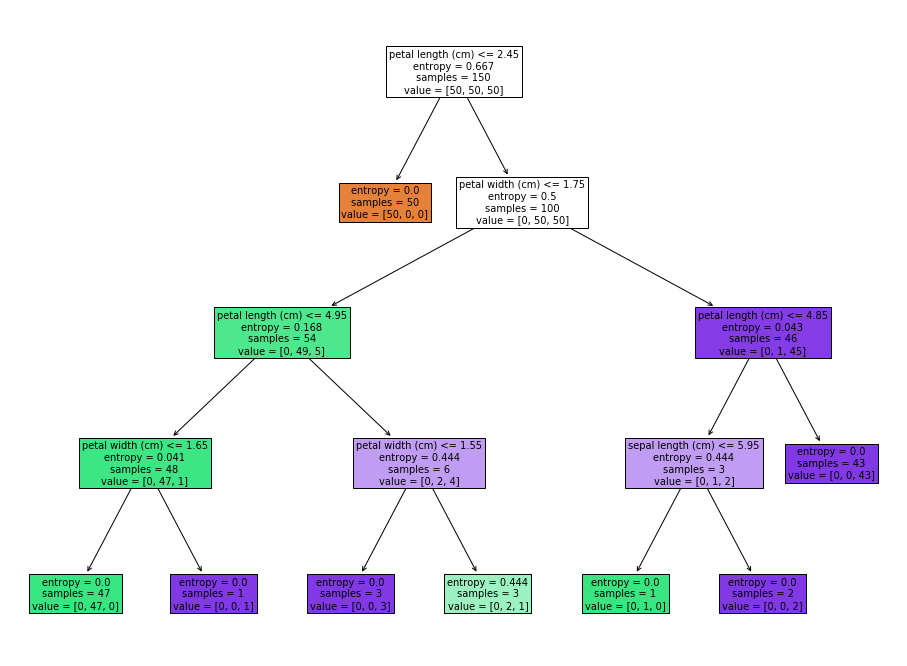

In [5]:
plt.rcParams['figure.figsize'] = (16, 12)
plot_tree(tree, filled=True, feature_names=iris_data.feature_names);

Alternative approach to visualization (better resolution)

In [6]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image

In [7]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [8]:
tree_graph_to_png(tree=tree, feature_names=iris_data.feature_names,
                 png_file_to_save='iris_tree.png')

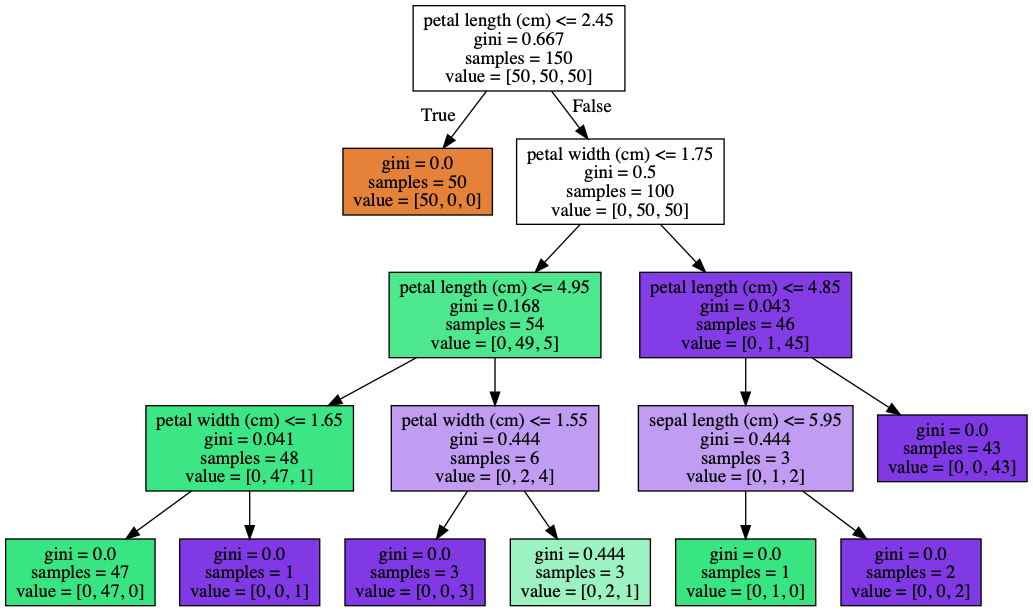

In [9]:
Image('iris_tree.png')

## Part 2. Ensembles and Random Forest

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz1\_q6-10__*

**Question 6.** There are 7 jurors in the courtroom. Each of them individually can correctly determine whether the defendant is guilty or not with 80% probability. How likely is the jury will make a correct verdict jointly if the decision is made by majority voting?



- 20.97%
- 80.00%
- 83.70%
- 96.66% **[+]**

 **Solution:**
Since the majority of votes is 4, then our $m = 4, N = 7, p = 0.8$. Substitute the variables in the formula from the [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7): $$ \large \mu = \sum_ {i = 4} ^ {7} C_7 ^ i0.8 ^ i (1-0.8) ^ {7-i} $$
After substituting and doing all operations, we get a response of 96.66%.

**Question 7.** In [Topic 5, part 2](https://mlcourse.ai/articles/topic5-part2-rf/), section 2. "Comparison with Decision Trees and Bagging" we show how bagging and Random Forest improve classification accuracy as compared to a single decision tree. Which of the following is a better explanation of the visual difference between decision boundaries built by a single desicion tree and those built by ensemble models?

- Ensembles ignore some of the features. Thus picking only important ones, they build a smoother decision boundary 
- Some of the classification rules built by a decision tree can be applied only to a small number of training instances  **[+]**
- When fitting a decision tree, if two potential splits are equally good in terms of information criterion, then a random split is chosen. This leads to some randomness in building a decision tree. Therefore its decision boundary is so jagged

 **Solution:** The jagged decision boundary built by a tree is explained by some rules which are applicable only to a small (even 1) number of training instances. 
 
**<font color='red'>Grading-wise:</font> all participants will get full credits for this question, see [Live Session 1](https://www.youtube.com/watch?v=EEjjENNH3J0)**

**Question 8.** Random Forest learns a coefficient for each input feature, which shows how much this feature influences the target feature. True/False?
 - True
 - False **[+]**
 
 **Solution:** False. Random Forest doesn't learn that. Linear models do instead. 
 
**<font color='red'>Grading-wise:</font> all participants will get full credits for this question, see [Live Session 1](https://www.youtube.com/watch?v=EEjjENNH3J0)**

**Question 9.** Suppose we fit `RandomForestRegressor` to predict age of a customer (a real task actually, good for targeting ads), and the maximal age seen in the dataset is 98 years. Is it possible that for some customer in future the model predicts his/her age to be 105 years?
 - Yes
 - No **[+]**
 
 **Solution:** Tree-based models can not extrapolate. In each leaf, the predicted value for test instances is equal to the average value of the target feature for all training instances in this leaf. Therefore, predicted values can not be higher than the maximal value of the target feature across training data. 

**Question 10.** Select all statements supporting advantages of Random Forest over decision trees (some statements might be true but not about Random Forest's pros, don't select those).

- Random Forest is easier to train in terms of computational resources
- Random Forest typically requires more RAM than a single decision tree 
- Random Forest typically achieves better metrics in classification/regression tasks **[+]**
- Single decision tree's prediction can be much easier interpreted

**Solution:**
 1 - wrong,
 2 - true, but it's not about Random Forest's pros,
 3 - true,
 4 - true, but it's not about Random Forest's pros